## 필수과제2 (직접 제가 드린 데이터셋)
- 정말 피처가 많은 데이터
- 그 데이터를 피처 셀렉션해서 실제 어떤 피처만 추출할지? 
    - 기준에 대한 이유
    - 코드(주석설명)
    - 실제 선택된 피처는 무엇인지?

In [222]:
df2 = pd.read_csv('bank_list.csv')
df2.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [223]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [224]:
df2['y'] = df2['y'].apply(lambda x: 1 if x=='yes' else 0)
df2['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [225]:
# 사용 피쳐 정리

x2 = df2[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration']]
y2 = df2['y']

In [226]:
y2.value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [227]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  duration     4119 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 354.1+ KB


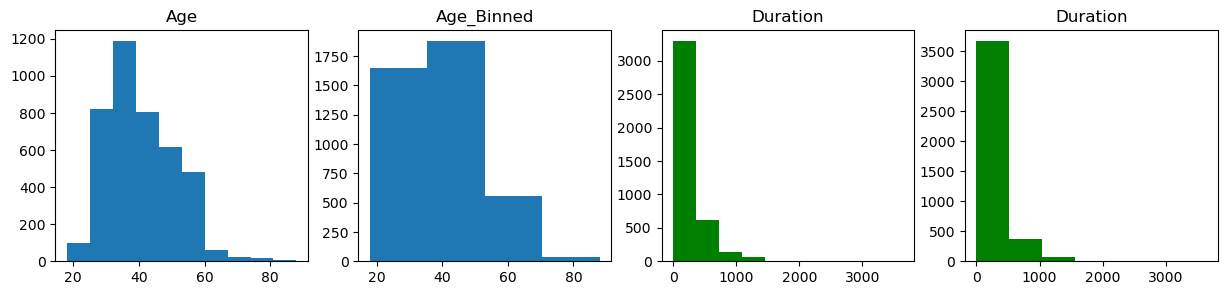

In [228]:
# 연속형 데이터 확인

plt.figure(figsize=(15,3))

plt.subplot(141)
plt.hist(df2['age'])
plt.title('Age')

plt.subplot(142)
plt.hist(df2['age'], bins=4)
plt.title('Age_Binned')

plt.subplot(143)
plt.hist(df2['duration'], color='g')
plt.title('Duration')

plt.subplot(144)
plt.hist(df2['duration'],bins=7, color='g')
plt.title('Duration')

plt.show()

In [229]:
# 연속형 데이터 범주형 변환 (분위수 기준 분할)

x2.loc[:,'age_binned'] = pd.qcut(x2['age'], q=4, labels=False)
x2.loc[:,'duration_binned'] = pd.qcut(x2['duration'], q=7, labels=False)

C:\Users\dsm53\AppData\Local\Temp\ipykernel_36736\285366583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.loc[:,'age_binned'] = pd.qcut(x2['age'], q=4, labels=False)
C:\Users\dsm53\AppData\Local\Temp\ipykernel_36736\285366583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.loc[:,'duration_binned'] = pd.qcut(x2['duration'], q=7, labels=False)


In [230]:
# 원핫인코딩 

from sklearn.preprocessing import OneHotEncoder

x2 = x2.drop(['age', 'duration'], axis=1)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

x2_encoded = onehot_encoder.fit_transform(x2)
x2_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [233]:
# 카이제곱 검정 

from sklearn.feature_selection import SelectKBest, chi2

chi_selector = SelectKBest(chi2, k='all')
x2_selected_all = chi_selector.fit_transform(x2_encoded,y2)
chi_scores = pd.DataFrame({
    'Feature': onehot_encoder.get_feature_names_out(x2.columns),
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

In [234]:
chi_scores

,Feature,Score
39,day_of_week_tue,0.014311
24,housing_yes,0.016201
10,job_unknown,0.019201
13,marital_unknown,0.038961
38,day_of_week_thu,0.040216
2,job_housemaid,0.101658
22,default_yes,0.122955
17,education_illiterate,0.122955
16,education_high.school,0.164432
40,day_of_week_wed,0.211249


<BarContainer object of 50 artists>

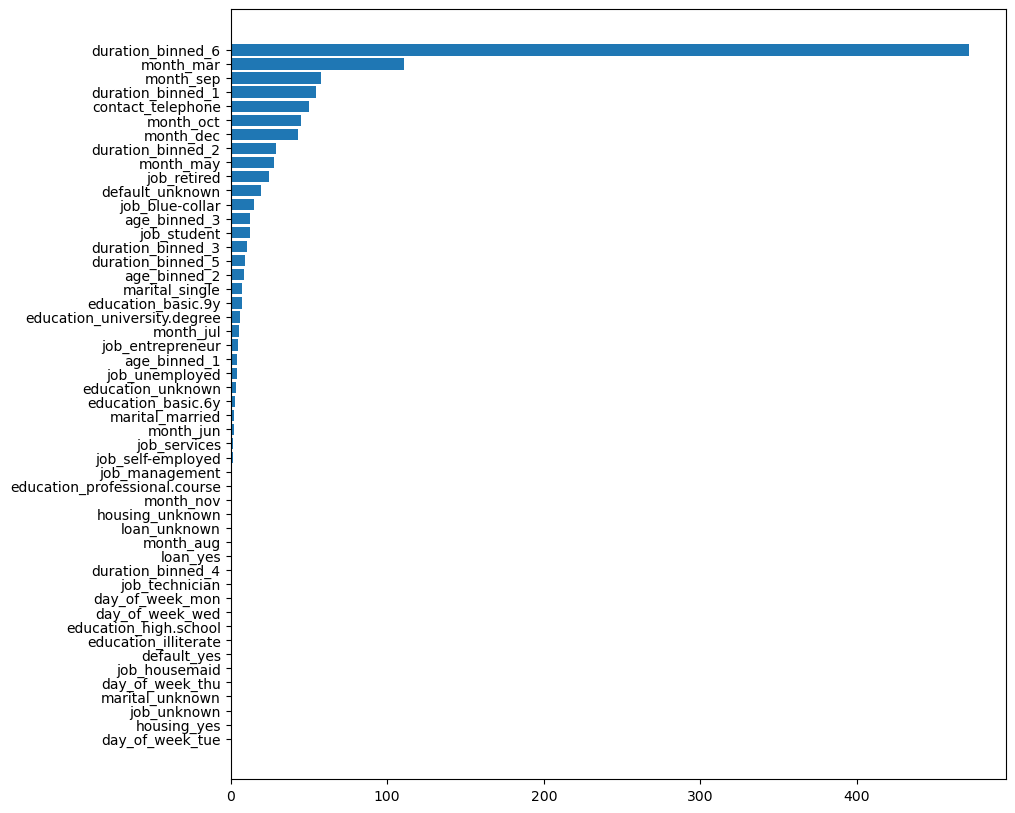

In [250]:
plt.figure(figsize=(10,10))
plt.barh(chi_scores['Feature'], chi_scores['Score'])

In [237]:
# 상위 10개 선택
chi_selector =SelectKBest(chi2, k=10)
x2_selected =chi_selector.fit_transform(x2_encoded,y2)

In [239]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(x2.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 10 artists>

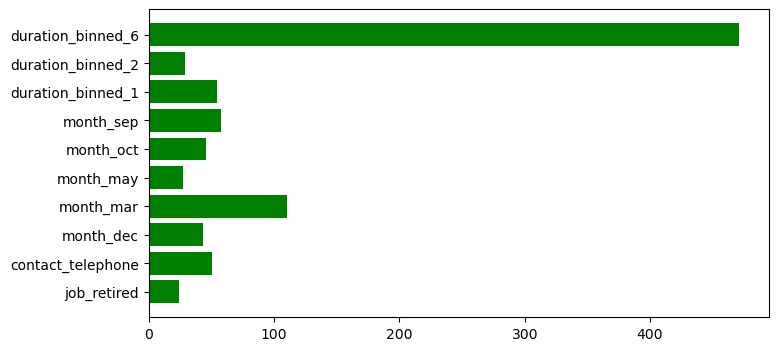

In [249]:
plt.figure(figsize=(8,4))
plt.barh(selected_features, selected_scores, color='g')